In this project, we'll practice working with chunked dataframes and optimizing a dataframe's memory usage. We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/), a marketplace for personal loans that matches borrowers with investors. We can read more about the marketplace [on its website](https://static.lendingclub.com/www/terms-of-use-violation.html?TS-request-id=7777781350443691333).

The Lending Club's website lists approved loans. Qualified investors can view the borrower's credit score, the purpose of the loan, and other details in the loan applications. Once a lender is ready to back a loan, it selects the amount of money it wants to fund. When the loan amount the borrower requested is fully funded, the borrower receives the money, minus the [origination fee](https://help.lendingclub.com/hc/en-us/articles/214463677) that Lending Club charges.

We'll be working with a dataset of loans approved from `2007-2011`, which we can download from [Lending Club's website](https://www.lendingclub.com/info/download-data.action). We've already removed the `desc` column to make our system run more quickly.

If we read in the entire data set, it will consume about 67 megabytes of memory. Let's imagine that we only have 10 megabytes of memory available throughout this project, so we can practice the concepts we learned in the last two files. 

[Solution](https://github.com/dataquestio/solutions/blob/master/Mission165Solutions.ipynb)

**Task**

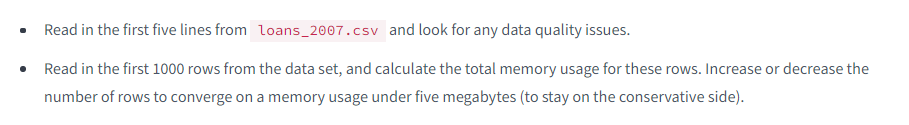

**Answer**

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

first_five = pd.read_csv('loans_2007.csv', nrows=5)
first_five

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [2]:
thousand_chunk = pd.read_csv('loans_2007.csv', nrows=1000)
thousand_chunk.memory_usage(deep=True).sum()/(1024*1024)

1.5273666381835938

### Let's try tripling to 3000 rows and calculate the memory footprint for each chunk.

In [3]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)
for chunk in chunk_iter:
    print(chunk.memory_usage(deep=True).sum()/(1024*1024))

4.580394744873047
4.576141357421875
4.577898979187012
4.579251289367676
4.575444221496582
4.577326774597168
4.575918197631836
4.578287124633789
4.576413154602051
4.57646369934082
4.589176177978516
4.588043212890625
4.594850540161133
4.828314781188965
0.868586540222168


### How many rows in the data set?

In [4]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

total_rows = 0
for chunk in chunk_iter:
    total_rows += len(chunk)
    
print(total_rows)

42538


## Exploring the Data in Chunks

Let's familiarize ourselves with the columns to see which ones we can optimize.

**Task**

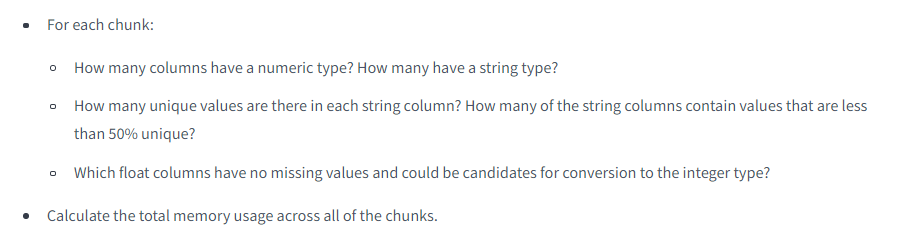

**Answer**

### How many columns have a numeric type? How many have a string type?

In [5]:
# Numeric columns
loans_chunks = pd.read_csv('loans_2007.csv',chunksize=3000)

numeric = []
string = []

for lc in loans_chunks:
    nums = lc.select_dtypes(include=[np.number]).shape[1]
    numeric.append(nums)
    strs = lc.select_dtypes(include=['object']).shape[1]
    string.append(strs)

print(numeric)
print(string)

[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22]


In [6]:
# Are string columns consistent across chunks?
obj_cols = []
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

for chunk in chunk_iter:
    chunk_obj_cols = chunk.select_dtypes(include=['object']).columns.tolist()
    if len(obj_cols) > 0:
        is_same = obj_cols == chunk_obj_cols
        if not is_same:
            print("overall obj cols:", obj_cols, "\n")
            print("chunk obj cols:", chunk_obj_cols, "\n")    
    else:
        obj_cols = chunk_obj_cols

overall obj cols: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

chunk obj cols: ['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

overall obj cols: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 



**Observation 1:** By default -- 31 numeric columns and 21 string columns.

**Observation 2:** It seems like one column in particular (the id column) is being cast to int64 in the last 2 chunks but not in the earlier chunks. Since the id column won't be useful for analysis, visualization, or predictive modelling let's ignore this column.


### How many unique values are there in each string column? How many of the string columns contain values that are less than 50% unique?

In [8]:
loans_chunks = pd.read_csv('loans_2007.csv',chunksize=3000)

uniques = {}
for lc in loans_chunks:
    strings_only = lc.select_dtypes(include=['object'])
    cols = strings_only.columns
    for c in cols:
        val_counts = strings_only[c].value_counts()
        if c in uniques:
            uniques[c].append(val_counts)
        else:
            uniques[c] = [val_counts]

uniques_combined = {}
unique_stats = {
    'column_name': [],
    'total_values': [],
    'unique_values': [],
}

for col in uniques:
    u_concat = pd.concat(uniques[col])
    u_group = u_concat.groupby(u_concat.index).sum()
    uniques_combined[col] = u_group
    if u_group.shape[0] < 50:
        print(col, u_group.shape[0])

term 2
grade 7
sub_grade 35
emp_length 11
home_ownership 5
verification_status 3
loan_status 9
pymnt_plan 2
purpose 14
initial_list_status 1
application_type 1


### Which float columns have no missing values and could be candidates for conversion to the integer type?

In [9]:
loans_chunks = pd.read_csv('loans_2007.csv',chunksize=3000)

missing = []
for lc in loans_chunks:
    floats = lc.select_dtypes(include=['float'])
    missing.append(floats.apply(pd.isnull).sum())

combined_missing = pd.concat(missing)
combined_missing.groupby(combined_missing.index).sum().sort_values()

member_id                        3
total_rec_int                    3
total_pymnt_inv                  3
total_pymnt                      3
revol_bal                        3
recoveries                       3
policy_code                      3
out_prncp_inv                    3
out_prncp                        3
total_rec_late_fee               3
loan_amnt                        3
last_pymnt_amnt                  3
total_rec_prncp                  3
funded_amnt_inv                  3
funded_amnt                      3
dti                              3
collection_recovery_fee          3
installment                      3
annual_inc                       7
inq_last_6mths                  32
total_acc                       32
delinq_2yrs                     32
pub_rec                         32
delinq_amnt                     32
open_acc                        32
acc_now_delinq                  32
tax_liens                      108
collections_12_mths_ex_med     148
chargeoff_within_12_

### Calculate the total memory usage across all of the chunks.

In [10]:
loans_chunks = pd.read_csv('loans_2007.csv',chunksize=3000)

mem_usage = []

for lc in loans_chunks:
    mem_usage.append(lc.memory_usage(deep=True).sum() / 1024 ** 2)

sum(mem_usage)

65.24251079559326

## Optimizing String Columns

As we learned, we can achieve the greatest memory improvements by converting the string columns to a numeric type. Let's convert all of the columns where the values are less than 50% unique to the category type, and the columns that contain numeric values to the float type.

**Task**

While working with dataframe chunks:

* Determine which string columns we can convert to a numeric type if we clean them. For example, the `int_rate` column is only a string because of the `%` sign at the end.
* Determine which columns have a few unique values and convert them to the category type. For example, we may want to convert the `grade` and `sub_grade` columns.
* Based on our conclusions, perform the necessary type changes across all chunks. Calculate the total memory footprint, and compare it with the previous one.

**Answer**

### Determine which string columns we can convert to a numeric type if we clean them. Let's focus on columns that would actually be useful for analysis and modelling.

In [12]:
print(obj_cols)

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']


In [13]:
useful_obj_cols = ['term', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status',
                   'issue_d', 'purpose', 'earliest_cr_line', 'revol_util', 'last_pymnt_d',
                   'last_credit_pull_d']

In [14]:
# Create dictionary (key: column, value: list of Series objects representing each chunk's value counts)

chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)
str_cols_vc = {}

for chunk in chunk_iter:
    str_cols = chunk.select_dtypes(include=['object'])
    for col in str_cols.columns:
        current_col_vc = str_cols[col].value_counts()
        if col in str_cols_vc:
            str_cols_vc[col].append(current_col_vc)
        else:
            str_cols_vc[col] = [current_col_vc]

In [15]:
# Combine the value counts.
combined_vcs = {}

for col in str_cols_vc:
    combined_vc = pd.concat(str_cols_vc[col])
    final_vc = combined_vc.groupby(combined_vc.index).sum()
    combined_vcs[col] = final_vc

In [16]:
for col in useful_obj_cols:
    print(col)
    print(combined_vcs[col])
    print("-----------")

term
 36 months    31534
 60 months    11001
Name: term, dtype: int64
-----------
sub_grade
A1    1142
A2    1520
A3    1823
A4    2905
A5    2793
B1    1882
B2    2113
B3    2997
B4    2590
B5    2807
C1    2264
C2    2157
C3    1658
C4    1370
C5    1291
D1    1053
D2    1485
D3    1322
D4    1140
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G3      79
G4      99
G5      86
Name: sub_grade, dtype: int64
-----------
emp_title
  old palm inc                       1
 Brocade Communications              1
 CenturyLink                         1
 Department of Homeland Security     1
 Down To Earth Distributors, Inc.    1
                                    ..
zashko inc.                          1
zeno office solutions                1
zion lutheran school                 1
zoll medical corp                    1
zozaya officiating                   1
Name: emp_title, Length: 30658, dtype: int

### Convert to category

In [17]:
convert_col_dtypes = {
    "sub_grade": "category", "home_ownership": "category", 
    "verification_status": "category", "purpose": "category"
}

### Convert term and revol_util to numerical by data cleaning.

### Convert issue_d, earliest_cr_line, last_pymnt_d, and last_credit_pull_d to datetime.

In [18]:
chunk[useful_obj_cols]

,term,sub_grade,emp_title,home_ownership,verification_status,issue_d,purpose,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
42000,36 months,C2,Best Buy,RENT,Not Verified,Feb-2008,debt_consolidation,Jul-2000,100.7%,Feb-2011,Jun-2016
42001,36 months,G2,CVS PHARMACY,OWN,Not Verified,Feb-2008,debt_consolidation,Mar-1989,51.9%,Nov-2008,Jun-2016
42002,36 months,E4,General Motors,RENT,Not Verified,Feb-2008,debt_consolidation,Dec-1998,80.7%,Feb-2011,Jun-2016
42003,36 months,G4,usa medical center,RENT,Not Verified,Feb-2008,debt_consolidation,Jul-1995,57.2%,Feb-2011,Jun-2011
42004,36 months,B3,InvestSource Inc,RENT,Not Verified,Feb-2008,debt_consolidation,Sep-2005,74%,Mar-2010,Aug-2010
...,...,...,...,...,...,...,...,...,...,...,...
42533,36 months,B3,NaN,RENT,Not Verified,Jun-2007,other,NaN,NaN,Jun-2010,May-2007
42534,36 months,A5,NaN,NONE,Not Verified,Jun-2007,other,NaN,NaN,Jun-2010,Aug-2007
42535,36 months,A3,Homemaker,MORTGAGE,Not Verified,Jun-2007,other,NaN,NaN,Jun-2010,Feb-2015
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Optimizing Numeric Columns

It looks like we were able to realize some powerful memory savings by converting to the category type and converting string columns to numeric ones.

Now let's optimize the numeric columns using the `pandas.to_numeric()` function.

**Task**

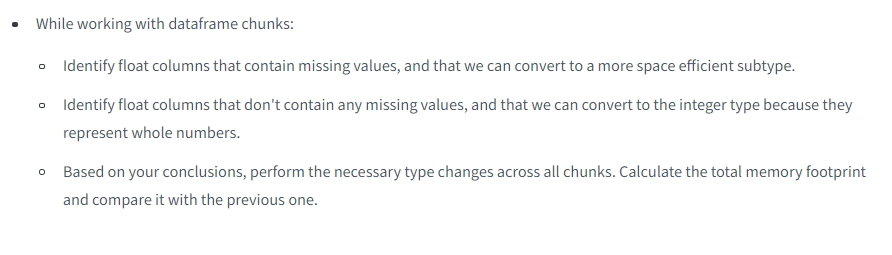

**Answer**

In [20]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_col_dtypes, 
                         parse_dates=["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"])

for chunk in chunk_iter:
    term_cleaned = chunk['term'].str.lstrip(" ").str.rstrip(" months")
    revol_cleaned = chunk['revol_util'].str.rstrip("%")
    chunk['term'] = pd.to_numeric(term_cleaned)
    chunk['revol_util'] = pd.to_numeric(revol_cleaned)
    
chunk.dtypes

id                                    object
member_id                            float64
loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                 float64
int_rate                              object
installment                          float64
grade                                 object
sub_grade                           category
emp_title                             object
emp_length                            object
home_ownership                      category
annual_inc                           float64
verification_status                 category
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                             category
title                                 object
zip_code                              object
addr_state                            object
dti       

In [22]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_col_dtypes, parse_dates=["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"])
mv_counts = {}
for chunk in chunk_iter:
    term_cleaned = chunk['term'].str.lstrip(" ").str.rstrip(" months")
    revol_cleaned = chunk['revol_util'].str.rstrip("%")
    chunk['term'] = pd.to_numeric(term_cleaned)
    chunk['revol_util'] = pd.to_numeric(revol_cleaned)
    float_cols = chunk.select_dtypes(include=['float'])
    for col in float_cols.columns:
        missing_values = len(chunk) - chunk[col].count()
        if col in mv_counts:
            mv_counts[col] = mv_counts[col] + missing_values
        else:
            mv_counts[col] = missing_values
            
print(mv_counts)

{'member_id': 3, 'loan_amnt': 3, 'funded_amnt': 3, 'funded_amnt_inv': 3, 'installment': 3, 'annual_inc': 7, 'dti': 3, 'delinq_2yrs': 32, 'inq_last_6mths': 32, 'open_acc': 32, 'pub_rec': 32, 'revol_bal': 3, 'revol_util': 93, 'total_acc': 32, 'out_prncp': 3, 'out_prncp_inv': 3, 'total_pymnt': 3, 'total_pymnt_inv': 3, 'total_rec_prncp': 3, 'total_rec_int': 3, 'total_rec_late_fee': 3, 'recoveries': 3, 'collection_recovery_fee': 3, 'last_pymnt_amnt': 3, 'collections_12_mths_ex_med': 148, 'policy_code': 3, 'acc_now_delinq': 32, 'chargeoff_within_12_mths': 148, 'delinq_amnt': 32, 'pub_rec_bankruptcies': 1368, 'tax_liens': 108, 'term': 3}


In [23]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_col_dtypes, parse_dates=["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"])

mv_counts = {}
for chunk in chunk_iter:
    term_cleaned = chunk['term'].str.lstrip(" ").str.rstrip(" months")
    revol_cleaned = chunk['revol_util'].str.rstrip("%")
    chunk['term'] = pd.to_numeric(term_cleaned)
    chunk['revol_util'] = pd.to_numeric(revol_cleaned)
    chunk = chunk.dropna(how='all')
    float_cols = chunk.select_dtypes(include=['float'])
    for col in float_cols.columns:
        missing_values = len(chunk) - chunk[col].count()
        if col in mv_counts:
            mv_counts[col] = mv_counts[col] + missing_values
        else:
            mv_counts[col] = missing_values

print(mv_counts)

{'member_id': 3, 'loan_amnt': 3, 'funded_amnt': 3, 'funded_amnt_inv': 3, 'installment': 3, 'annual_inc': 7, 'dti': 3, 'delinq_2yrs': 32, 'inq_last_6mths': 32, 'open_acc': 32, 'pub_rec': 32, 'revol_bal': 3, 'revol_util': 93, 'total_acc': 32, 'out_prncp': 3, 'out_prncp_inv': 3, 'total_pymnt': 3, 'total_pymnt_inv': 3, 'total_rec_prncp': 3, 'total_rec_int': 3, 'total_rec_late_fee': 3, 'recoveries': 3, 'collection_recovery_fee': 3, 'last_pymnt_amnt': 3, 'collections_12_mths_ex_med': 148, 'policy_code': 3, 'acc_now_delinq': 32, 'chargeoff_within_12_mths': 148, 'delinq_amnt': 32, 'pub_rec_bankruptcies': 1368, 'tax_liens': 108, 'term': 3}


In this project, we practiced optimizing a dataframe's memory footprint and working with dataframe chunks. Here's an idea for some next steps:

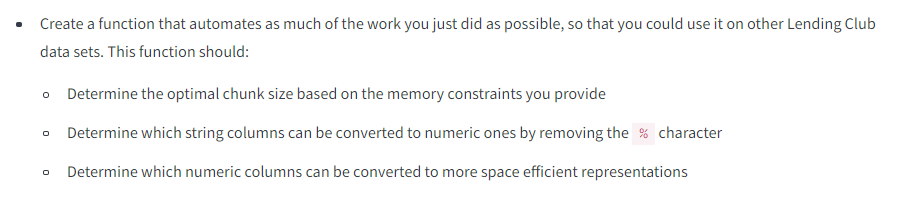